In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Create 'taste' column and split data

In [4]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Fit data and compute accuracy

In [8]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [9]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train Acc: {accuracy_score(y_train, y_pred_tr)}')
print(f'Test Acc: {accuracy_score(y_test, y_pred_test)}')

Train Acc: 0.7427361939580527
Test Acc: 0.7438461538461538


### Modeling Pipeline (+ scaling)
- basically doing the same thing, but using a pipeline.
- In this case, simply set up estimators and feed them into the pipeline.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))    
]

pipe = Pipeline(estimators)

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [13]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f'Train Acc: {accuracy_score(y_train, y_pred_tr)}')
print(f'Test Acc: {accuracy_score(y_test, y_pred_test)}')

Train Acc: 0.7444679622859341
Test Acc: 0.7469230769230769


### Model comparison: logistic regression vs decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [15]:
models = {
    'logistic regression': pipe,
    'decision tree': wine_tree
}

In [16]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

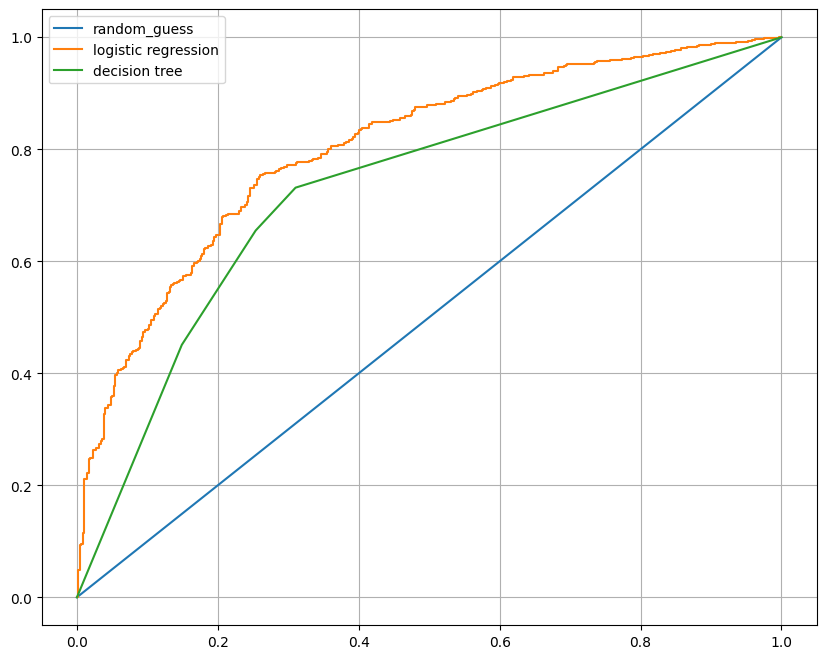

In [17]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]  # because index 0 is p(0)
    fpr, tpr, threshold = roc_curve(y_test, pred)
    
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

### Precision-Accuracy Tradeoff

For reminder, the following are the formulas for important metrics used in classification models.

__1. Accuracy__

$$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}} $$

__2. Precision (Positive Predictive Value)__

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

__3. Recall (Sensitivity, True Positive Rate)__

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

__4. F1-Score__

$$\text{F1-Score} = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}}$$

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

Row: actual class

Column: predicted class

In [22]:
print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [131 692]]


In [19]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



#### Remember that precision and recall are in a tradeoff relationship.

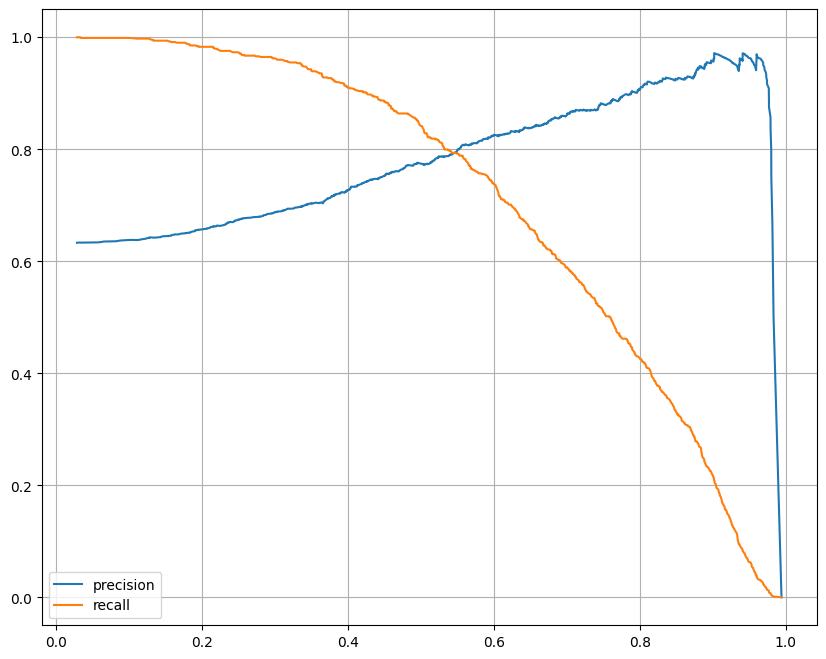

In [24]:
plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid(); plt.legend(); plt.show()

In some cases, you may want to change the threshold to optimize your model.

By default, the threshold is set at 0.5.

In [27]:
import numpy as np

In [26]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40532048, 0.59467952],
       [0.50953321, 0.49046679],
       [0.10220167, 0.89779833]])

In [28]:
np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40532048, 0.59467952, 1.        ],
       [0.50953321, 0.49046679, 0.        ],
       [0.10220167, 0.89779833, 1.        ],
       ...,
       [0.22550296, 0.77449704, 1.        ],
       [0.6736399 , 0.3263601 , 0.        ],
       [0.31450061, 0.68549939, 1.        ]])

In [29]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [30]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



Notice that as the threshold increased from 0.5 to 0.6, precision increased, while recall decreased.